<a href="https://colab.research.google.com/github/miguelsmachado/data_science/blob/master/Mestrado_noia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Lendo o banco de dados

In [95]:
df = pd.read_csv("data.csv", sep="\t")

# Visualizando os dados

In [96]:
print("Existem %i entradas" %df.shape[0])
df.head()

Existem 19719 entradas


,race,age,engnat,gender,hand,source,country,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,2,5,1,4,3,5,1,1,5,2,5,1,1,1,1,1,1,1,5,1,5,2,3,1,5,4,5,4,1,5,1,5,1,4,1,4,5,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,3,3,3,1,5,1,5,2,3,4,2,3,4,3,2,2,4,1,3,3,4,4,4,2,3,4,3,4,1,3,2,3,1,5,1,4,4,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,4,5,1,1,5,5,1,5,1,5,5,5,5,5,5,5,5,5,1,5,5,1,5,1,5,5,5,4,1,5,1,5,1,5,1,5,5,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,4,3,4,3,4,4,5,5,4,4,2,4,5,5,5,4,5,2,5,4,4,3,5,3,4,4,3,3,3,4,5,1,4,5,4,2,3,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,3,3,1,3,1,3,5,3,3,3,4,3,3,3,3,3,4,5,5,3,5,1,5,1,5,5,5,3,1,5,3,3,1,1,3,3,3,3,1,1,1,3,1,3,1,5,3


# Separando somente as respostas das pesquisas

In [ ]:
# big5_df = df.iloc[:,:50]
big5_df = df.iloc[:, 7:]

print(big5_df.shape)
big5_df.head()

(19719, 50)


,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,4,2,5,2,5,1,4,3,5,1,1,5,2,5,1,1,1,1,1,1,1,5,1,5,2,3,1,5,4,5,4,1,5,1,5,1,4,1,4,5,4,1,3,1,5,1,4,2,5,5
1,2,2,3,3,3,3,1,5,1,5,2,3,4,2,3,4,3,2,2,4,1,3,3,4,4,4,2,3,4,3,4,1,3,2,3,1,5,1,4,4,3,3,3,3,2,3,3,1,3,2
2,5,1,1,4,5,1,1,5,5,1,5,1,5,5,5,5,5,5,5,5,5,1,5,5,1,5,1,5,5,5,4,1,5,1,5,1,5,1,5,5,4,5,5,1,5,1,5,5,5,5
3,2,5,2,4,3,4,3,4,4,5,5,4,4,2,4,5,5,5,4,5,2,5,4,4,3,5,3,4,4,3,3,3,4,5,1,4,5,4,2,3,4,3,5,2,4,2,5,2,5,5
4,3,1,3,3,3,1,3,1,3,5,3,3,3,4,3,3,3,3,3,4,5,5,3,5,1,5,1,5,5,5,3,1,5,3,3,1,1,3,3,3,3,1,1,1,3,1,3,1,5,3


# Verificando a existência de dados nulos

In [ ]:
big5_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19719 entries, 0 to 19718
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   E1      19719 non-null  int64
 1   E2      19719 non-null  int64
 2   E3      19719 non-null  int64
 3   E4      19719 non-null  int64
 4   E5      19719 non-null  int64
 5   E6      19719 non-null  int64
 6   E7      19719 non-null  int64
 7   E8      19719 non-null  int64
 8   E9      19719 non-null  int64
 9   E10     19719 non-null  int64
 10  N1      19719 non-null  int64
 11  N2      19719 non-null  int64
 12  N3      19719 non-null  int64
 13  N4      19719 non-null  int64
 14  N5      19719 non-null  int64
 15  N6      19719 non-null  int64
 16  N7      19719 non-null  int64
 17  N8      19719 non-null  int64
 18  N9      19719 non-null  int64
 19  N10     19719 non-null  int64
 20  A1      19719 non-null  int64
 21  A2      19719 non-null  int64
 22  A3      19719 non-null  int64
 23  A4      197

# Escalonando os dados

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

big5_scaled = scaler.fit_transform(big5_df)

big5_scaled

array([[ 1.1123939 , -0.57827155,  1.28012518, ..., -0.95959447,
         0.88154815,  1.01172009],
       [-0.51027923, -0.57827155, -0.33696569, ..., -1.75394581,
        -1.15336528, -2.03797802],
       [ 1.92373047, -1.33943147, -1.95405655, ...,  1.42345955,
         0.88154815,  1.01172009],
       ...,
       [-0.51027923,  1.7052082 ,  0.47157975, ...,  1.42345955,
         0.88154815,  1.01172009],
       [-1.32161579,  0.94404828, -1.14551112, ..., -0.16524313,
         0.88154815,  1.01172009],
       [-0.51027923,  0.18288837, -1.95405655, ...,  1.42345955,
         0.88154815,  1.01172009]])

# Clusterizando com o KMeans

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
modelo_kmeans = KMeans(n_clusters=5, random_state=1802)
modelo_kmeans.fit(big5_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1802, tol=0.0001, verbose=0)

In [ ]:
modelo_kmeans.labels_

array([3, 2, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
grupos_kmeans = pd.DataFrame(data=modelo_kmeans.cluster_centers_, columns=big5_df.columns)
grupos_kmeans

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,-0.566586,0.513645,-0.692989,0.680137,-0.571539,0.327393,-0.652376,0.517065,-0.514225,0.655406,0.637448,-0.481634,0.604190,-0.497989,0.431985,0.619305,0.553729,0.602891,0.529696,0.763687,-0.222538,-0.032094,0.018149,0.343912,-0.189121,0.319123,0.010185,0.163259,0.329676,-0.200437,-0.094552,0.166246,0.212200,0.372229,-0.235456,0.210878,0.106959,0.190481,-0.072949,0.106198,0.307516,-0.194586,0.420971,-0.260838,0.146893,-0.265048,0.107991,0.381448,0.469644,0.294726
1,0.739023,-0.768470,0.588693,-0.647964,0.728912,-0.602499,0.772366,-0.630018,0.672287,-0.611920,0.175276,-0.017780,0.169720,-0.085179,0.211824,0.250603,0.368497,0.327502,0.232323,0.076198,-0.069596,0.455878,0.276767,0.205678,-0.257953,0.126924,-0.400549,0.195106,0.282234,0.319771,-0.296841,0.433475,-0.199679,0.390783,-0.314068,0.408529,-0.306790,0.262629,-0.253809,-0.182854,0.133701,-0.086834,0.255360,-0.123643,0.222426,-0.258143,0.058862,0.169261,0.018052,0.315726
2,-0.340120,0.361916,-0.375250,0.315922,-0.450368,0.624723,-0.403004,0.213563,-0.368987,0.363636,0.256235,-0.213312,0.181519,-0.031591,0.339567,0.318698,0.217880,0.253907,0.240267,0.216958,0.249803,-0.350429,-0.025479,-0.100401,0.179179,0.071661,0.302018,-0.215742,-0.181880,-0.345563,-0.310941,-0.071828,-0.448728,0.187669,-0.063366,0.095404,-0.172795,0.244277,-0.127040,-0.418329,-0.851340,0.837708,-0.733602,0.685095,-0.941977,0.837530,-0.792305,-0.668714,-0.408993,-1.053850
3,0.322171,-0.308239,0.657548,-0.449046,0.518272,-0.441909,0.474384,-0.182462,0.270534,-0.472152,-0.638888,0.443347,-0.510442,0.421074,-0.617668,-0.718859,-0.783290,-0.796325,-0.763733,-0.755675,-0.318467,0.438021,-0.491203,0.343180,-0.373637,0.167587,-0.505309,0.395552,0.310415,0.513729,0.507580,-0.388826,0.338783,-0.710212,0.552891,-0.540857,0.314807,-0.615245,0.448201,0.387181,0.156695,-0.276287,-0.016747,-0.179161,0.312313,-0.182390,0.328106,-0.084835,-0.020067,0.239861
4,-0.489326,0.552628,-0.682432,0.468594,-0.692665,0.436292,-0.627492,0.297721,-0.314187,0.422680,-0.308642,0.158860,-0.396462,0.065239,-0.234790,-0.335189,-0.150484,-0.183883,0.028045,-0.044344,0.695147,-1.027823,0.547998,-1.355572,1.158913,-1.100456,1.176850,-1.011549,-1.270961,-0.726501,0.058187,-0.048942,-0.000480,-0.024019,-0.166283,-0.018975,-0.038458,0.169487,-0.194737,-0.014910,0.289438,-0.269335,0.103333,-0.082858,0.205877,-0.082330,0.268881,0.336167,-0.063647,0.153450


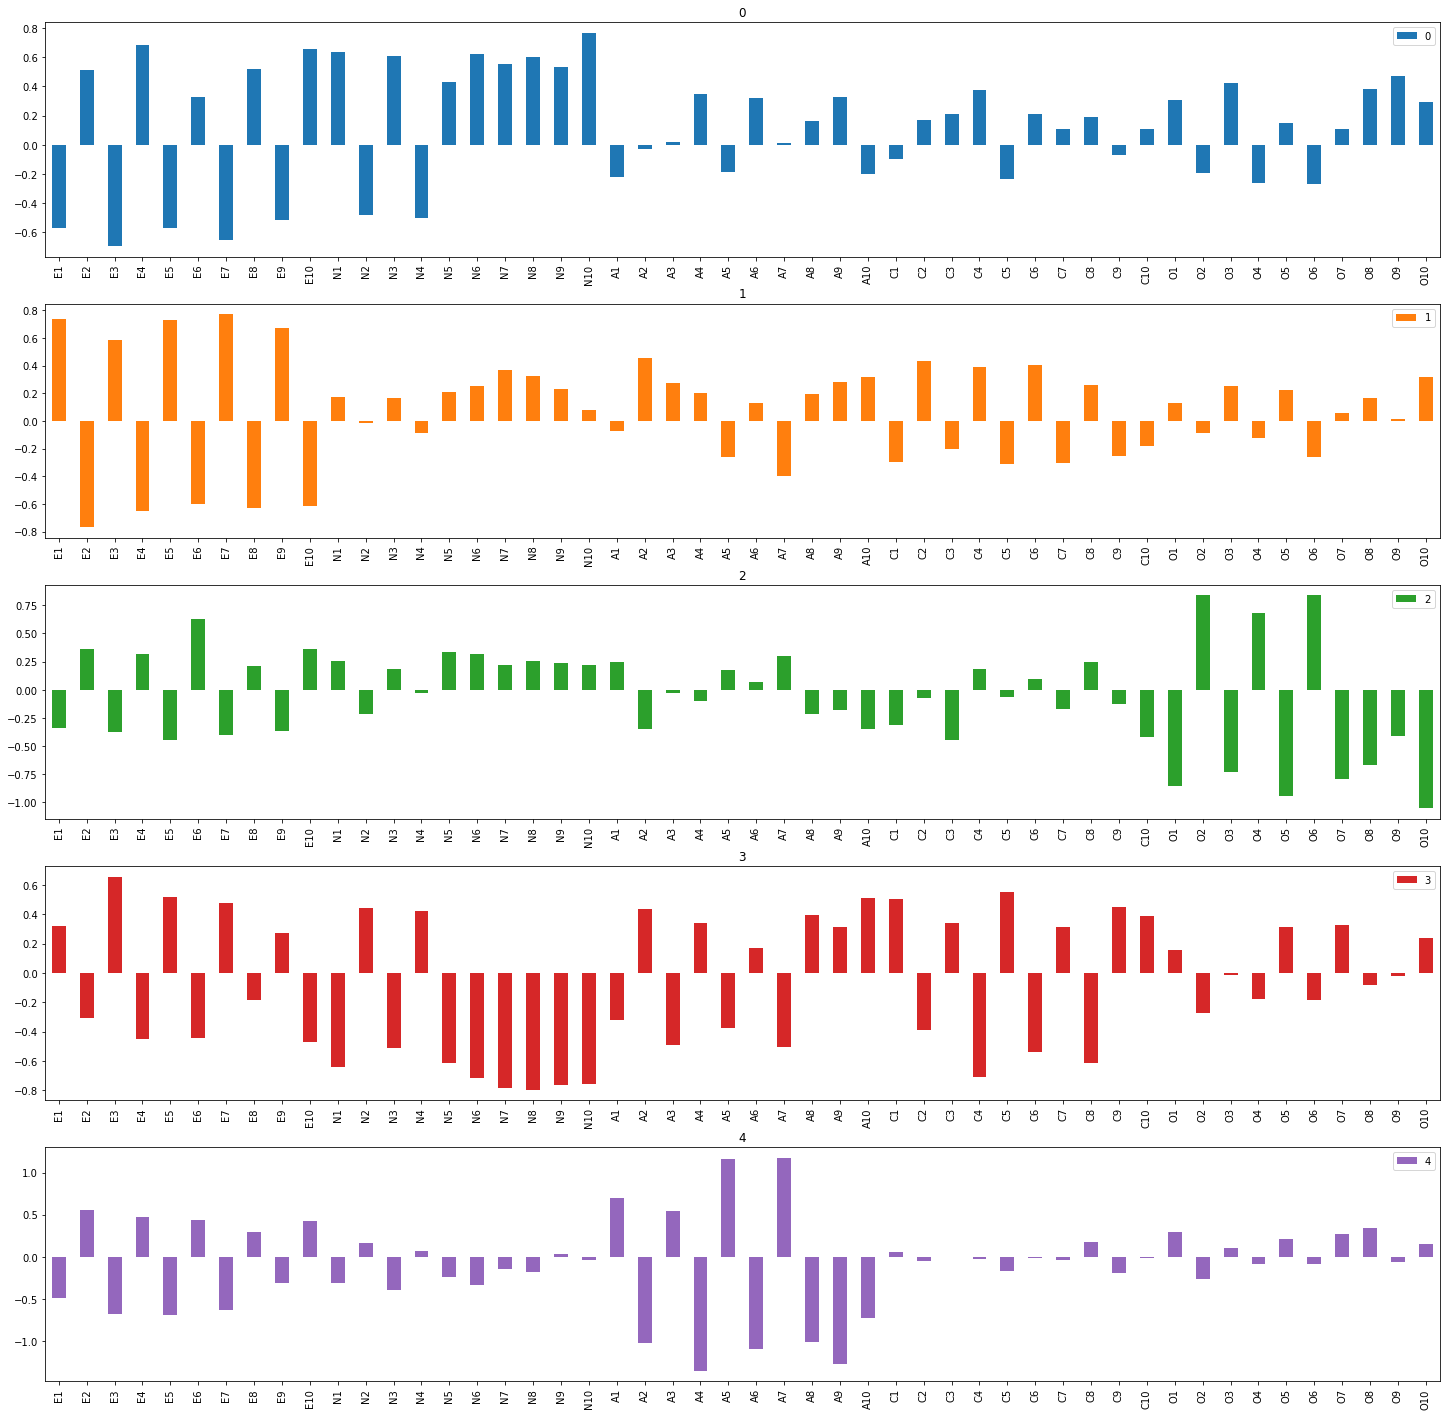

In [ ]:
grupos_kmeans.transpose().plot.bar(subplots=True,
                            figsize=(25,25),
                            sharex=False);

# Redimensionalizando e verificando os dados em 2d

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2)

df_redimensionado = tsne.fit_transform(big5_scaled)

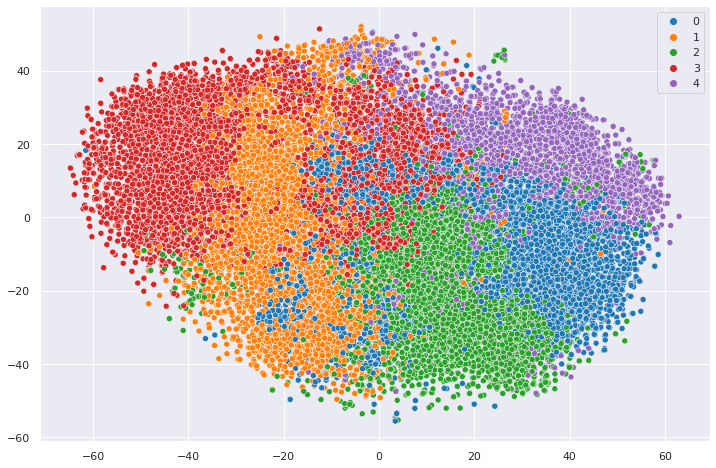

In [ ]:
sns.set()
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_redimensionado[:,0], y=df_redimensionado[:,1],
                hue=modelo_kmeans.labels_,
                palette="tab10");

# Criando o modelo de classificação

In [ ]:
X = big5_df
y = modelo_kmeans.labels_

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

## Usando Decision Tree Classifier

In [100]:
SEED = 1802
np.random.seed(SEED)

classificador = DecisionTreeClassifier(max_depth=9)

CV = StratifiedKFold(n_splits=10)

resultado = cross_validate(classificador, X, y, cv=CV)

media = resultado['test_score'].mean() * 100
desvio_padrao = resultado['test_score'].std() * 100

print("Media %.2f" % media)
print("Intervalo de confiança: [%.2f, %.2f]" % ((media-desvio_padrao), (media+desvio_padrao)))

Media 68.81
Intervalo de confiança: [67.33, 70.29]


In [103]:
from sklearn.svm import SVC

SEED = 1802
np.random.seed(SEED)

classificador = SVC()

CV = StratifiedKFold(n_splits=10)

resultado = cross_validate(classificador, X, y, cv=CV)

media = resultado['test_score'].mean() * 100
desvio_padrao = resultado['test_score'].std() * 100

print("Média %.2f" % media)
print("Intervalo de confiança: [%.2f, %.2f]" % ((media-desvio_padrao), (media+desvio_padrao)))

Média 96.96
Intervalo de confiança: [96.76, 97.15]


### Realizando previsões com SVC

In [104]:
classificador.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Criando um aluno aleatório

In [105]:
aluno = np.random.randint(1, 6, 50)
aluno

array([5, 5, 1, 1, 5, 1, 1, 4, 1, 1, 5, 1, 1, 5, 5, 3, 5, 5, 1, 1, 4, 5,
       2, 1, 1, 4, 5, 5, 2, 3, 4, 5, 2, 2, 5, 1, 3, 1, 3, 5, 3, 1, 1, 3,
       2, 3, 2, 2, 2, 3])

In [107]:
print("Esse aluno pertence ao grupo %i" %classificador.predict([aluno])[0])

Esse aluno pertence ao grupo 2


# Reduzindo o número de perguntas

## Selecionando as 20 melhores

In [127]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selecionar_kmelhores = SelectKBest(chi2, k = 20)

treino_x, teste_x, treino_y, teste_y = train_test_split(X, 
                                                        y,
                                                        test_size = 0.3)



selecionar_kmelhores.fit(treino_x,treino_y)

treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

In [144]:
melhores_20 = []
for i, j in list(zip(selecionar_kmelhores.get_support(), big5_df.columns)):
  if i:
    melhores_20.append(j)
melhores_20

['E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E9',
 'E10',
 'N1',
 'N6',
 'N7',
 'N8',
 'N9',
 'N10',
 'A5',
 'A7',
 'C4',
 'O2',
 'O6']

## Treinando com as 20 melhores

In [155]:
X = big5_df[melhores_20]
y = modelo_kmeans.labels_

In [150]:
from sklearn.svm import SVC

SEED = 1802
np.random.seed(SEED)

classificador = SVC()

CV = StratifiedKFold(n_splits=10)

resultado = cross_validate(classificador, X, y, cv=CV)

media = resultado['test_score'].mean() * 100
desvio_padrao = resultado['test_score'].std() * 100

print("Média %.2f" % media)
print("Intervalo de confiança: [%.2f, %.2f]" % ((media-desvio_padrao), (media+desvio_padrao)))

Média 96.96
Intervalo de confiança: [96.76, 97.15]


Conseguimos manter o resultado com 20 perguntas!

## Realizando a redução de dimensionalidade e verificação em 2d

In [156]:
from sklearn.manifold import TSNE

In [157]:
tsne = TSNE(n_components=2)

df_redimensionado = tsne.fit_transform(X)

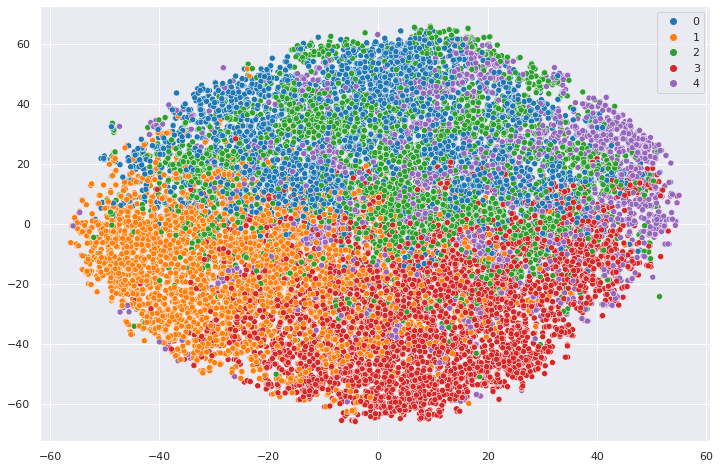

In [158]:
sns.set()
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_redimensionado[:,0], y=df_redimensionado[:,1],
                hue=modelo_kmeans.labels_,
                palette="tab10");

## Selecionando as 10 melhores

In [151]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selecionar_kmelhores = SelectKBest(chi2, k = 10)

treino_x, teste_x, treino_y, teste_y = train_test_split(X, 
                                                        y,
                                                        test_size = 0.3)



selecionar_kmelhores.fit(treino_x,treino_y)

treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

In [152]:
melhores_10 = []
for i, j in list(zip(selecionar_kmelhores.get_support(), big5_df.columns)):
  if i:
    melhores_10.append(j)
melhores_10

['E1', 'E2', 'E3', 'E5', 'E6', 'E7', 'N6', 'N8', 'N10', 'A7']

## Treinando com as 10 melhores

In [153]:
X = big5_df[melhores_10]
y = modelo_kmeans.labels_

In [154]:
from sklearn.svm import SVC

SEED = 1802
np.random.seed(SEED)

classificador = SVC()

CV = StratifiedKFold(n_splits=10)

resultado = cross_validate(classificador, X, y, cv=CV)

media = resultado['test_score'].mean() * 100
desvio_padrao = resultado['test_score'].std() * 100

print("Média %.2f" % media)
print("Intervalo de confiança: [%.2f, %.2f]" % ((media-desvio_padrao), (media+desvio_padrao)))

Média 62.65
Intervalo de confiança: [62.02, 63.28]


Com 10 perguntas houve muita perda de informação e o resultado não foi satisfatório